In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel('/storage/emulated/0/Download/ANZ.xlsx',engine='openpyxl')

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [8]:
cat_feat_1=['status','card_present_flag','bpay_biller_code','txn_description','gender','merchant_state','movement','country']

In [9]:
for i in cat_feat_1:
    print(data[i].value_counts())

authorized    7717
posted        4326
Name: status, dtype: int64
1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64
0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
M    6285
F    5758
Name: gender, dtype: int64
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64
debit     11160
credit      883
Name: movement, dtype: int64
Australia    12043
Name: country, dtype: int64


## EXPLOATORY DATA ANALYSIS 1

We would be comparing the following features for our exploratory study:
1). Gender
2). Age
3). txn_description
4). card_present_flag
5). account
6). balance
7). date
8). merchant_state
9). movement

Text(0.5, 0, 'Gender')

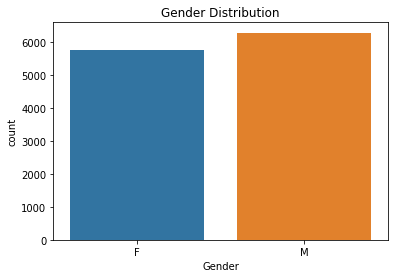

In [10]:
sns.countplot(x='gender',data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')

There are slightly more men than women in this dataset with men occupying approximately 52% of the dataset and women 48%

Text(0.5, 0, 'Age')

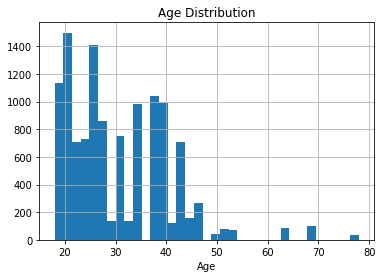

In [11]:
data.hist('age',bins=35)
plt.title('Age Distribution')
plt.xlabel('Age')

The ages are mostly between 20 to 35 which coincides with the value our describe attributes that gives us a mean of 30.58. There are lesser older customers and this could result from the technicality of the banking system which could require at least an intermediate understanding of modern banking operations, hence the reason why youths are the major customers.

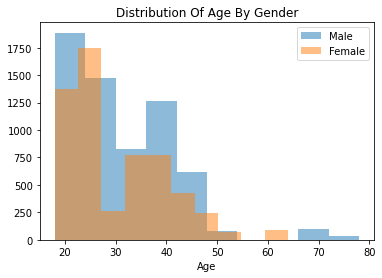

In [12]:
plt.hist('age',data=data[data['gender']=='M'],alpha=0.5,label='Male')
plt.hist('age',data=data[data['gender']=='F'],alpha=0.5,label='Female')
plt.title('Distribution Of Age By Gender')
plt.xlabel('Age')
plt.legend(loc=0)

There are more younger men than there are younger women who are customers at ANZ and also we have more middle age men than women in the dataset and then an even ratio of the elderly's.
Lets also see the state where most of these customers come from in Australia.

Before proceeding lets examine the merchant state distribution

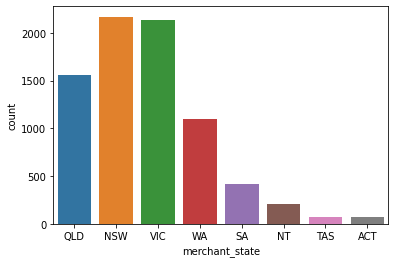

In [13]:
sns.countplot(x='merchant_state',data=data)

QLD --> Queensland
NSW--> New South Wales
SA--> South Australia
TAS--> Tasmania
VIC--> Victoria
WA--> Western Australia
NT--> Northern Territory
ACT--> Australia Capital Territory

The majority of the customers come from the New South Wales and Victoria , followed by the Queensland and Western Autralia.

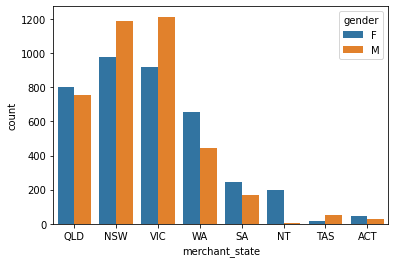

In [14]:
sns.countplot(x='merchant_state',hue='gender',data=data)

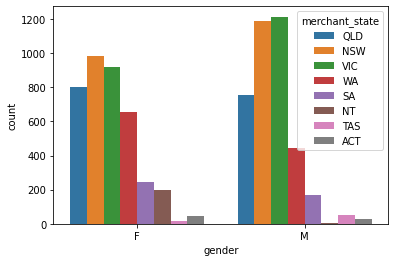

In [15]:
sns.countplot(x='gender',hue='merchant_state',data=data)

The bar charts above shows that the reason we have high customers from the NSW and VIC regions is because these areas are densely populated by people compared to the other states.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xdb1c7598>]],
      dtype=object)

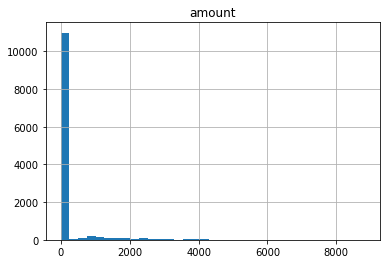

In [16]:
data.hist('amount',bins=35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xdb183100>]],
      dtype=object)

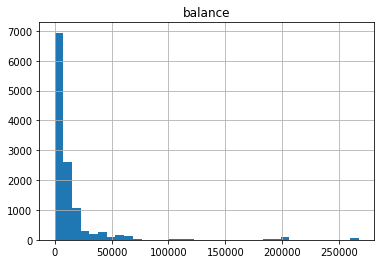

In [17]:
data.hist('balance',bins=35)

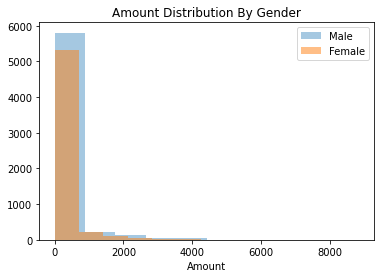

In [18]:
plt.hist('amount',data=data[data['gender']=='M'],alpha=0.4,label='Male')
plt.hist('amount',data=data[data['gender']=='F'],alpha=0.5,label='Female')

plt.title('Amount Distribution By Gender')
plt.xlabel('Amount')
plt.legend(loc=0)

The majority of the amount came from men more than female

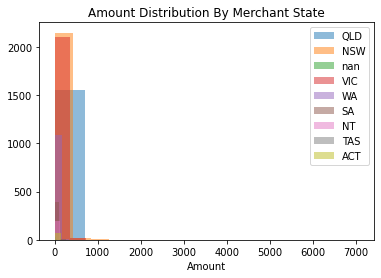

In [19]:
for item in data['merchant_state'].unique():
    plt.hist('amount',data=data[data['merchant_state']==item],alpha=0.5,label=item)
    plt.title('Amount Distribution By Merchant State')
    plt.xlabel('Amount')
    plt.legend(loc=0)

For the very reason that we have more people in the NSW and VIC the volume of the amount recorded in the dataset these state have the highest amount and balance transactions

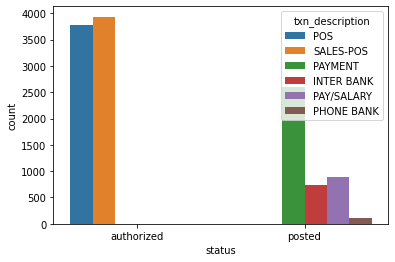

In [20]:
sns.countplot(x='status',hue='txn_description',data=data)

From this bar chart we can see a very useful information here that most of the authorized transactions are from POS and SALES-POS transactions while the others , i.e the payment, inter bank, pay/salary, and phone bank transactions are posted.

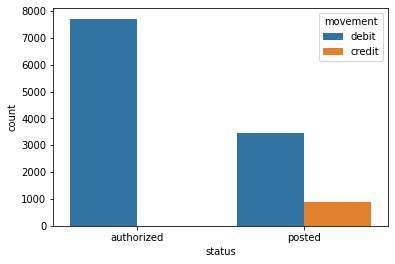

In [21]:
sns.countplot(x='status',hue='movement',data=data)

In [22]:
data.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

Comparing the result in these dataframe and the chart before it we can clearly see that the only credit transaction is the payment/salary and all of the transactions under it have all been authorized.

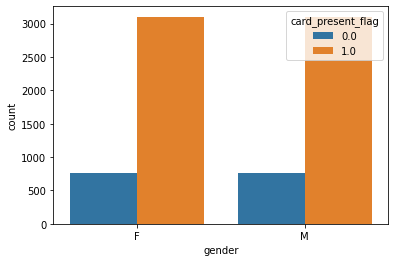

In [23]:
sns.countplot(x='gender',hue='card_present_flag',data=data)

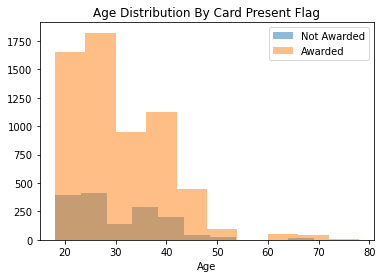

In [24]:
plt.hist('age',data=data[data['card_present_flag']==0],alpha=0.5,label='Not Awarded')
plt.hist('age',data=data[data['card_present_flag']==1],alpha=0.5,label='Awarded')
plt.title('Age Distribution By Card Present Flag')
plt.xlabel('Age')
plt.legend(loc=0)

In [25]:
data.amount.mean()

187.93358797641784

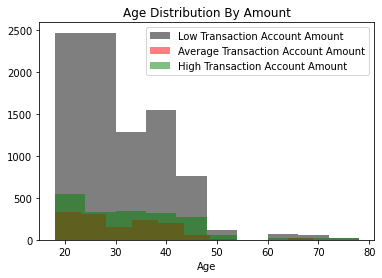

In [26]:
plt.hist('age',data=data[data['amount']<50],alpha=0.5,label='Low Transaction Account Amount',color='black')
plt.hist('age',data=data[(data['amount']>=50) & (data['amount']<100)],alpha=0.5,label='Average Transaction Account Amount',color='red')
plt.hist('age',data=data[data['amount']>100],alpha=0.5,label='High Transaction Account Amount',color='green')
plt.title('Age Distribution By Amount')
plt.xlabel('Age')
plt.legend(loc=0)

In [27]:
data.balance.mean()

14704.195553433528

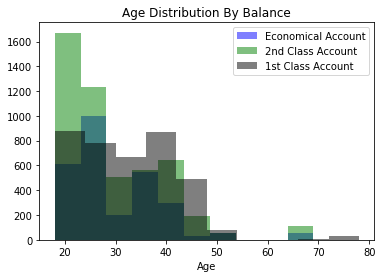

In [28]:
plt.hist('age',data=data[data['balance']<3000],alpha=0.5,label='Economical Account',color='blue')
plt.hist('age',data=data[(data['balance']>=3000) & (data['balance']<9000)],alpha=0.5,label='2nd Class Account',color='green')
plt.hist('age',data=data[data['balance']>10000],alpha=0.5,label='1st Class Account',color='black')
plt.title('Age Distribution By Balance')
plt.xlabel('Age')
plt.legend(loc=0)

Most of the customers under the age bracket from 20-30 are running a 2nd class account with average account balances, while those in between the age of 35-40 run a 1st class account retaining huge account balances.

Most of the people under the average age running the economical class account were given the card present 

# EXPLORATORY DATA ANALYSIS 2

We would be considering: 

1). Number of transaction each day

2). Total number of transactions made by each customer

3). Transaction volume each day


4). Mean transaction amount each day

5). Features Correlation

# Number Of Transactions Each Day

In [29]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [30]:
data['date'].value_counts().mean()

132.34065934065933

The mean number of transaction each day is 132

# Number Of Transactions Made By Each Customer

In [31]:
data['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [32]:
data['customer_id'].value_counts().mean()

120.43

The average number of transactions made by a customer is  approximately 120

In [47]:
data['amount'].mean()

187.93358797641784

In [48]:
data['balance'].mean()

14704.195553433528

In [54]:
data.groupby('date')['balance'].mean().mean()

14715.591152733332

Average recorded balance per day is $14716

In [55]:
data.groupby('date')['amount'].mean().mean()

190.61056774083966

Average recorded amount transacted per day is $191

## Transaction Volume Per Day

In [33]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [34]:
data_date_count=data.groupby('date').count()

In [35]:
data_date_count

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,137,84,13,137,137,137,137,84,13,137,...,137,84,84,137,137,137,137,137,84,137
2018-08-02,152,99,10,152,152,152,152,99,10,152,...,152,99,99,152,152,152,152,152,99,152
2018-08-03,157,99,15,157,157,157,157,99,15,157,...,157,99,99,157,157,157,157,157,99,157
2018-08-04,118,94,0,118,118,118,118,94,0,118,...,118,94,94,118,118,118,118,118,94,118
2018-08-05,100,73,0,100,100,100,100,73,0,100,...,100,73,73,100,100,100,100,100,73,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,139,101,0,139,139,139,139,101,0,139,...,139,101,101,139,139,139,139,139,101,139
2018-10-28,143,101,0,143,143,143,143,101,0,143,...,143,101,101,143,143,143,143,143,101,143
2018-10-29,102,63,16,102,102,102,102,63,16,102,...,102,63,63,102,102,102,102,102,63,102


In [36]:
cust_trans=data_date_count['customer_id'].mean()
n_points=len(data_date_count.index)

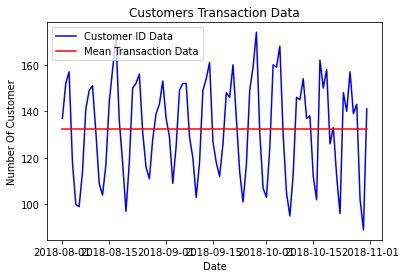

In [37]:
plt.plot(data_date_count.index,data_date_count['customer_id'],color='blue',label='Customer ID Data')
plt.plot(data_date_count.index,np.linspace(cust_trans,cust_trans,n_points),color='red',label='Mean Transaction Data')
plt.title('Customers Transaction Data')
plt.xlabel('Date')
plt.ylabel('Number Of Customer')
plt.legend(loc=0)

## Transaction Amount Each Day

In [38]:
data_date_mean=data.groupby('date').mean()
data_date_mean

,card_present_flag,merchant_code,balance,age,amount
date,,,,,
2018-08-01,0.750000,0.0,9933.975328,30.233577,218.014161
2018-08-02,0.858586,0.0,13963.617895,31.493421,143.331053
2018-08-03,0.797980,0.0,10187.786688,31.751592,242.653376
2018-08-04,0.787234,NaN,8206.809407,31.033898,53.356356
2018-08-05,0.739726,NaN,13297.525400,29.910000,44.265000
...,...,...,...,...,...
2018-10-27,0.801980,NaN,17025.213741,31.194245,50.155252
2018-10-28,0.772277,NaN,15298.837483,30.258741,59.007762
2018-10-29,0.746032,0.0,20863.967843,29.460784,377.932745


In [39]:
amt_trans=data_date_mean['amount']

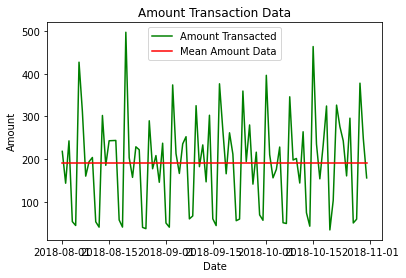

In [40]:
plt.plot(data_date_mean.index,amt_trans,color='green',label='Amount Transacted')
plt.plot(data_date_mean.index,np.linspace(amt_trans.mean(),amt_trans.mean(),n_points),color='red',label='Mean Amount Data')
plt.title('Amount Transaction Data')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(loc=0)

## Transaction Balance Each Day

In [41]:
data_date_mean=data.groupby('date').mean()
data_date_mean

,card_present_flag,merchant_code,balance,age,amount
date,,,,,
2018-08-01,0.750000,0.0,9933.975328,30.233577,218.014161
2018-08-02,0.858586,0.0,13963.617895,31.493421,143.331053
2018-08-03,0.797980,0.0,10187.786688,31.751592,242.653376
2018-08-04,0.787234,NaN,8206.809407,31.033898,53.356356
2018-08-05,0.739726,NaN,13297.525400,29.910000,44.265000
...,...,...,...,...,...
2018-10-27,0.801980,NaN,17025.213741,31.194245,50.155252
2018-10-28,0.772277,NaN,15298.837483,30.258741,59.007762
2018-10-29,0.746032,0.0,20863.967843,29.460784,377.932745


In [42]:
bal_trans=data_date_mean['balance']

Text(0, 0.5, 'Balance')

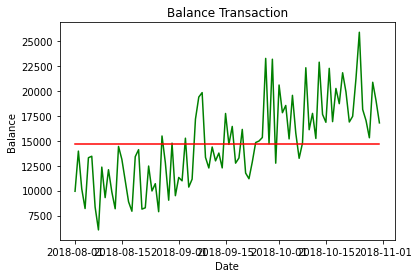

In [43]:
plt.plot(data_date_mean.index,bal_trans,color='green',label='Balance Transaction')
plt.plot(data_date_mean.index,np.linspace(bal_trans.mean(),bal_trans.mean(),n_points),color='red',label='Mean Balance Data')
plt.title('Balance Transaction')
plt.xlabel('Date')
plt.ylabel('Balance')

## Features Correlation

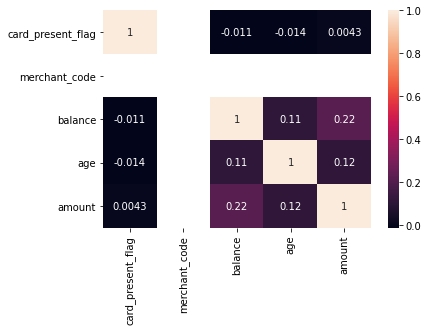

In [44]:
sns.heatmap(data.corr(method='spearman'),annot=True)

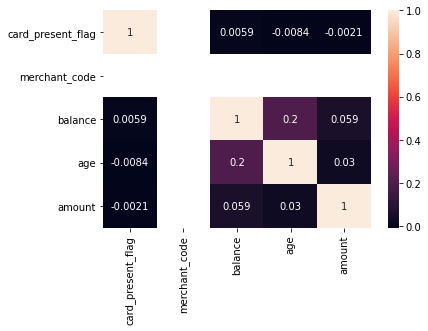

In [45]:
sns.heatmap(data.corr(method='pearson'),annot=True)